In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup


In [53]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
URL=['https://www.cars24.com/buy-used-cars-hyderabad/?itm_source=Cars24Website&itm_medium=sticky_header',
     'https://www.cars24.com/buy-used-cars-new-delhi/?itm_source=Cars24Website&itm_medium=sticky_header',
    'https://www.cars24.com/buy-used-cars-bengaluru/?itm_source=Cars24Website&itm_medium=sticky_header',
    'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&pinId=400001']
  

In [3]:
for i in range(2, 4):
    URL.append('https://www.cars24.com/buy-used-cars-hyderabad/?itm_source=Cars24Website&itm_medium=sticky_header&page={}'. format(i))
for i in range(2,9):
    URL.append('https://www.cars24.com/buy-used-cars-new-delhi/?itm_source=Cars24Website&itm_medium=sticky_header&page={}'.format(i))
for i in range(2,15):
    URL.append('https://www.cars24.com/buy-used-cars-bengaluru/?itm_source=Cars24Website&itm_medium=sticky_header&page={}'.format(i))
for i in range(2,23):
    URL.append('https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page={}'.format(i))
    

In [4]:
%%time

cnames = []
c_type = []
c_details = []
c_price = []
EMI = []
discount = []
location=[]

for url in URL:
    
    page = requests.get(url)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : 'col-4'}):

        name = x.find('h2', attrs={'class' : '_3FpCg'})
        if name is None:
            cnames.append(np.NaN)
        else:
            cnames.append(name.text)

        c_t = x.find('p', attrs={'class' : 'cvakB'})
        if c_t is None:
            c_type.append(np.NaN)
        else:
            c_type.append(c_t.text)

        details = x.find('ul', attrs={'class' : 'bVR0c'})
        if details is None:
            c_details.append(np.NaN)
        else:
            c_details.append(details.text)

        price = x.find('div', attrs={'class' : '_7udZZ'})
        if price is None:
            c_price.append(np.NaN)
        else:
            c_price.append(price.text)
            
        emi = x.find('div', attrs={'class' : '_2HFRN'})
        if emi is None:
            EMI.append(np.NaN)
        else:
            EMI.append(emi.text)
            
        disc = x.find('div', attrs={'class' : '_3mZ8j'})
        if disc is None:
            discount.append(np.NaN)
        else:
            discount.append(disc.text)
            
        if 'hyderabad' in url:
            location.append('Hyderabad')
        elif 'new-delhi' in url:
            location.append('New Delhi')
        elif 'bengaluru' in url:
            location.append('Bengaluru')
        elif 'CityId=2378' in url:
            location.append('Mumbai')
        else: 
            location.append(np.NaN)
                
            

Wall time: 24 s


In [5]:
print(len(cnames))
print(len(c_type))
print(len(c_details))
print(len(c_price))
print(len(EMI))
print(len(discount))
print(len(location))

901
901
901
901
901
901
901


In [76]:
df = pd.DataFrame({'Name' : cnames, 'Type' : c_type, 'Details' : c_details, 'Price' : c_price,'EMI':EMI,'Discount':discount,
                  'Location':location})

In [77]:
df

,Name,Type,Details,Price,EMI,Discount,Location
0,2019 Toyota Innova Crysta,2.4 GX 8 STR Manual,"187,298 km1st OwnerDiesel","₹1,465,799","₹32,606/month","₹50,000 OFF",Hyderabad
1,2017 Maruti Swift,ZXI Manual,"45,719 km1st OwnerPetrol","₹627,499","₹13,958/month","₹33,000 OFF",Hyderabad
2,2017 Honda Jazz,1.2 V AT Automatic,"64,497 km2nd OwnerPetrol","₹633,799","₹14,099/month","₹25,000 OFF",Hyderabad
3,2019 Renault Kwid,1.0 RXT Opt Manual,"31,559 km1st OwnerPetrol","₹407,599","₹9,067/month","₹27,000 OFF",Hyderabad
4,2012 Maruti Ritz,VXI ABS Manual,"116,534 km2nd OwnerPetrol","₹314,399","₹6,994/month","₹25,000 OFF",Hyderabad
...,...,...,...,...,...,...,...
896,2017 Maruti Dzire,ZXI Manual,"37,024 km1st OwnerPetrol","₹562,099","₹12,504/month","₹50,000 OFF",Mumbai
897,2015 Hyundai Grand i10,SPORTS 1.2 VTVT Manual,"35,613 km1st OwnerPetrol","₹411,299","₹9,149/month","₹22,000 OFF",Mumbai
898,2019 Maruti Dzire,VXI Manual,"19,015 km1st OwnerPetrol","₹653,799","₹14,543/month","₹16,000 OFF",Mumbai
899,2017 Maruti Wagon R 1.0,LXI CNG Manual,"110,993 km1st OwnerPetrol + CNG","₹379,299","₹8,437/month","₹5,000 OFF",Mumbai


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      817 non-null    object
 1   Type      817 non-null    object
 2   Details   817 non-null    object
 3   Price     817 non-null    object
 4   EMI       817 non-null    object
 5   Discount  813 non-null    object
 6   Location  901 non-null    object
dtypes: object(7)
memory usage: 49.4+ KB


In [79]:
# Identifying missing values in columns
df.isnull().sum()

Name        84
Type        84
Details     84
Price       84
EMI         84
Discount    88
Location     0
dtype: int64

In [80]:
# Columns with atleast one missing value
df.isnull().any(axis=0)

Name         True
Type         True
Details      True
Price        True
EMI          True
Discount     True
Location    False
dtype: bool

In [81]:
# Columns with all missing values
df.isnull().all(axis=0)

Name        False
Type        False
Details     False
Price       False
EMI         False
Discount    False
Location    False
dtype: bool

In [82]:
# Number of columns with all missing values
df.isnull().all(axis=0).sum()

0

In [83]:
# Rows with atleast one missing values
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
896    False
897    False
898    False
899    False
900    False
Length: 901, dtype: bool

In [84]:
#Rows with all missing values
df.isnull().all(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
896    False
897    False
898    False
899    False
900    False
Length: 901, dtype: bool

In [85]:
# Number of rows with all missing values
df.isnull().all(axis=1).sum()

0

In [86]:
#Missing values Treatment in Columns
round(100*(df.isnull().sum()/len(df.index)), 2)

Name        9.32
Type        9.32
Details     9.32
Price       9.32
EMI         9.32
Discount    9.77
Location    0.00
dtype: float64

In [87]:
df[df.isnull().sum(axis=1) >= 4]

,Name,Type,Details,Price,EMI,Discount,Location
5,NaN,NaN,NaN,NaN,NaN,NaN,Hyderabad
6,NaN,NaN,NaN,NaN,NaN,NaN,Hyderabad
27,NaN,NaN,NaN,NaN,NaN,NaN,New Delhi
28,NaN,NaN,NaN,NaN,NaN,NaN,New Delhi
49,NaN,NaN,NaN,NaN,NaN,NaN,Bengaluru
...,...,...,...,...,...,...,...
845,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
866,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
867,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
888,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai


In [88]:
# retaining the rows having <= 4 NaNs
df = df[df.isnull().sum(axis=1) <= 4]

# look at the summary again
round(100*(df.isnull().sum()/len(df.index)), 2)

Name        0.00
Type        0.00
Details     0.00
Price       0.00
EMI         0.00
Discount    0.49
Location    0.00
dtype: float64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 900
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      817 non-null    object
 1   Type      817 non-null    object
 2   Details   817 non-null    object
 3   Price     817 non-null    object
 4   EMI       817 non-null    object
 5   Discount  813 non-null    object
 6   Location  817 non-null    object
dtypes: object(7)
memory usage: 51.1+ KB


In [90]:
df['Name'].value_counts()

2018 Maruti Vitara Brezza     21
2016 Hyundai Grand i10        18
2018 Ford Ecosport            15
2015 Hyundai Grand i10        14
2015 Maruti Swift             14
                              ..
2009 Hyundai i20               1
2014 Maruti Ertiga             1
2018 Mahindra TUV300           1
2010 Honda Jazz                1
2016 Mercedes Benz E Class     1
Name: Name, Length: 273, dtype: int64

In [91]:
import re
regex = r'^2\d+'

df['Year'] = df['Name'].apply(lambda x : re.findall(regex, x) if x!='NaN' else x)
df.Year = df.Year.apply(lambda x: "".join(x))
df.Year=df.Year.astype(int)

In [92]:
df.Year.value_counts()

2018    155
2017    151
2016    115
2019    110
2015     86
2014     68
2020     41
2012     36
2013     32
2011      9
2009      6
2010      5
2021      3
Name: Year, dtype: int64

In [93]:
b=[]

for i in df['Name'] :
    if i == 0:
        b.append(0)
    else:
        b.append(i.split()[1])
df['Brand'] = b

In [94]:
df.Brand.value_counts()

Maruti        401
Hyundai       195
Ford           55
Honda          45
Renault        25
Tata           23
Volkswagen     21
Toyota         13
KIA            10
MG              8
Mahindra        7
Datsun          4
Skoda           3
Jeep            2
Audi            1
Ssangyong       1
Mercedes        1
BMW             1
Nissan          1
Name: Brand, dtype: int64

In [95]:
c=[]
for i in df['Name'] :
    if i == 0:
        c.append(0)
    else:
        c.append(i.split()[2:])
df['Model']=c
df.Model = df.Model.apply(lambda x: " ".join(x) if x!='NaN' else x)

In [96]:
df.Model.value_counts()

Swift            64
Grand i10        52
Vitara Brezza    48
Baleno           45
Ecosport         40
                 ..
Tucson New        1
XUV 3OO           1
New Elantra       1
Mobilio           1
Micra             1
Name: Model, Length: 87, dtype: int64

In [97]:
df.Model.isnull().any()

False

In [98]:
regex = r'(?:Manual|Automatic)'
df['car_type'] = df.Type.apply(lambda x : re.findall(regex,x) if x!='NaN' else x)
df.car_type = df.car_type.apply(lambda x: "".join(x))

In [99]:
df.car_type.value_counts()

Manual       674
Automatic    120
              23
Name: car_type, dtype: int64

In [100]:
df['Type'].replace(to_replace=["Manual","Automatic"],value="",inplace=True,regex=True)

In [101]:
df.Type.value_counts()

VXI                       84
VDI                       36
LXI                       27
DELTA 1.2 K12             25
VXI AMT                   19
                          ..
S PETROL MT                1
BASE 1.2                   1
Sportz 1.2 VTVT MT         1
2.5 ZX 7 STR BS IV         1
1.0 TREND+ (ECOBOOST)      1
Name: Type, Length: 287, dtype: int64

In [102]:
df.Details.value_counts()

15,112 km1st OwnerPetrol     2
3,919 km1st OwnerPetrol      1
15,575 km1st OwnerPetrol     1
2,407 km1st OwnerPetrol      1
5,701 km1st OwnerPetrol      1
                            ..
17,058 km1st OwnerPetrol     1
124,487 km1st OwnerDiesel    1
51,849 km1st OwnerDiesel     1
12,811 km2nd OwnerPetrol     1
11,728 km1st OwnerPetrol     1
Name: Details, Length: 816, dtype: int64

In [105]:
regex = r'([,\d]+\skm)'
df['km'] = df.Details.apply(lambda x : re.findall(regex,x) if x!="NaN" else x)
df.km = df.km.apply(lambda x: "".join(x))
df['km'].replace(to_replace=["km",','],value="",inplace=True,regex=True)
df.km=df.km.astype(int)

In [106]:
regex = r'(?:1st|2nd)'
df['owner'] = df.Details.apply(lambda x : re.findall(regex,x) if x!='NaN' else x)
df.owner = df.owner.apply(lambda x: "".join(x))
#df['owner'].replace(to_replace=["st","nd"],value="",inplace=True,regex=True)


In [107]:
regex = r'(?:Petrol|Diesel)'
df['fuel'] = df.Details.apply(lambda x : re.findall(regex,x) if x!='NaN' else x)
df.fuel = df.fuel.apply(lambda x: "".join(x))

In [109]:
df['Price'].replace(to_replace=["₹",","],value="",inplace=True,regex=True)
df.Price=df.Price.astype(int)
df['Price'].isnull().sum()

0

In [110]:
df['EMI'].replace(to_replace=["₹",",","/month"],value="",inplace=True,regex=True)
df.EMI=df.EMI.astype(int)
df['EMI'].isnull().sum()

0

In [111]:
df['Discount'].replace(to_replace=["₹",",","OFF"],value="",inplace=True,regex=True)
df.Discount=df.Discount.astype(float)
df['Discount'].isnull().sum()

4

In [123]:
df['Discount'].fillna(df['Discount'].median(), inplace=True)

In [112]:
df.drop(["Name","Details"],axis=1,inplace=True)

In [124]:
df

,Year,Brand,Model,Type,car_type,owner,fuel,km,Price,Discount,EMI,Location
0,2019,Toyota,Innova Crysta,2.4 GX 8 STR,Manual,1,Diesel,187298,1465799,50000.0,32606,Hyderabad
1,2017,Maruti,Swift,ZXI,Manual,1,Petrol,45719,627499,33000.0,13958,Hyderabad
2,2017,Honda,Jazz,1.2 V AT,Automatic,2,Petrol,64497,633799,25000.0,14099,Hyderabad
3,2019,Renault,Kwid,1.0 RXT Opt,Manual,1,Petrol,31559,407599,27000.0,9067,Hyderabad
4,2012,Maruti,Ritz,VXI ABS,Manual,2,Petrol,116534,314399,25000.0,6994,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...
896,2017,Maruti,Dzire,ZXI,Manual,1,Petrol,37024,562099,50000.0,12504,Mumbai
897,2015,Hyundai,Grand i10,SPORTS 1.2 VTVT,Manual,1,Petrol,35613,411299,22000.0,9149,Mumbai
898,2019,Maruti,Dzire,VXI,Manual,1,Petrol,19015,653799,16000.0,14543,Mumbai
899,2017,Maruti,Wagon R 1.0,LXI CNG,Manual,1,Petrol,110993,379299,5000.0,8437,Mumbai


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 900
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      817 non-null    int32  
 1   Brand     817 non-null    object 
 2   Model     817 non-null    object 
 3   Type      817 non-null    object 
 4   car_type  817 non-null    object 
 5   owner     817 non-null    object 
 6   fuel      817 non-null    object 
 7   km        817 non-null    int32  
 8   Price     817 non-null    int32  
 9   Discount  817 non-null    float64
 10  EMI       817 non-null    int32  
 11  Location  817 non-null    object 
dtypes: float64(1), int32(4), object(7)
memory usage: 70.2+ KB


<AxesSubplot:>

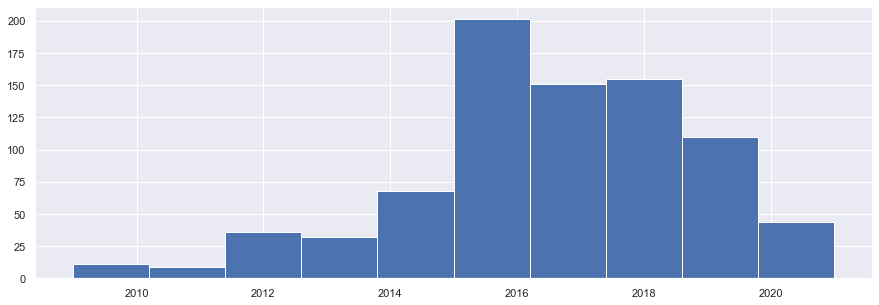

In [128]:
sns.set()
df['Year'].hist()

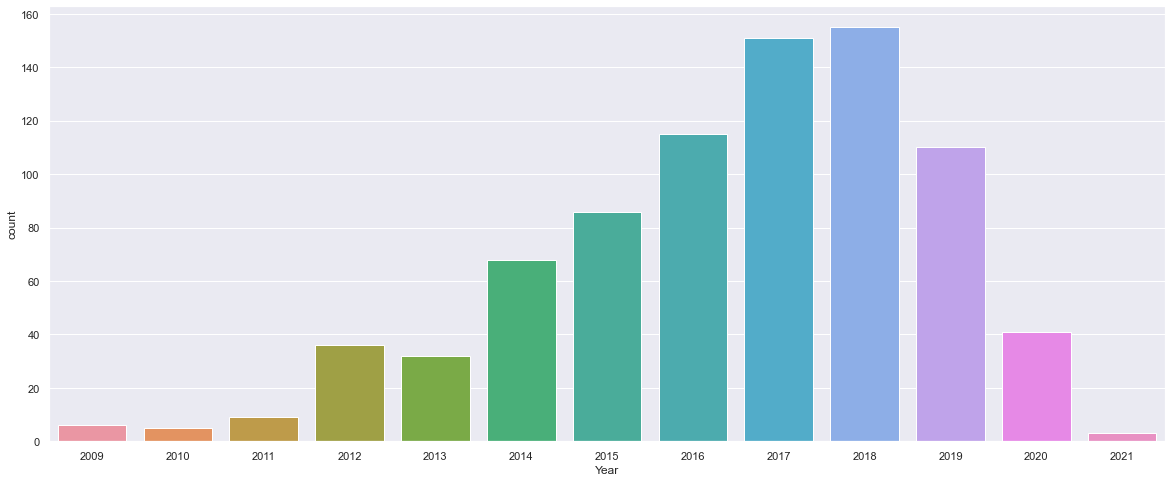

In [139]:
plt.figure(figsize=(20,8))
sns.countplot(df['Year'])
plt.show()

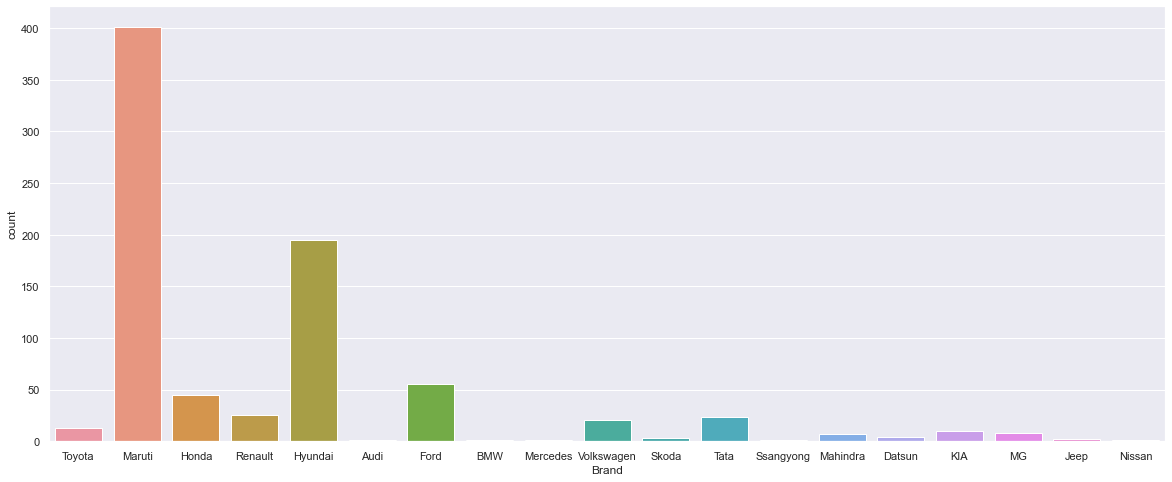

In [133]:
plt.figure(figsize=(20,8))
sns.countplot(df['Brand'])
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Density'>

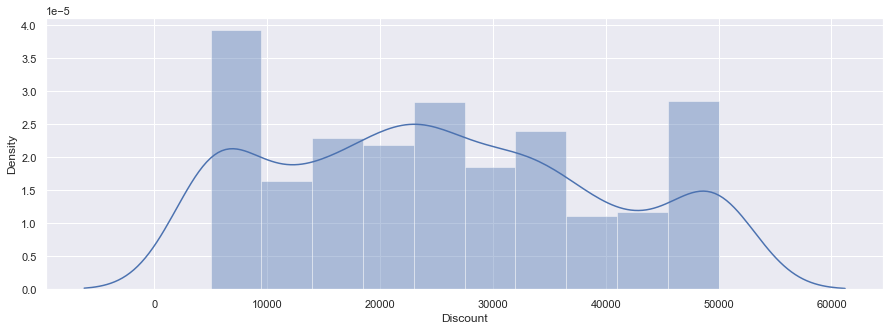

In [126]:
sns.distplot(df.Discount)

<AxesSubplot:>

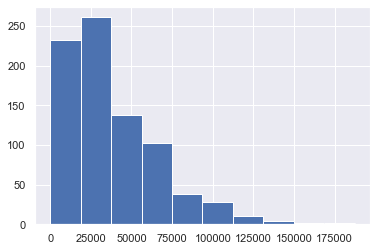

In [119]:
sns.set()
df['km'].hist()

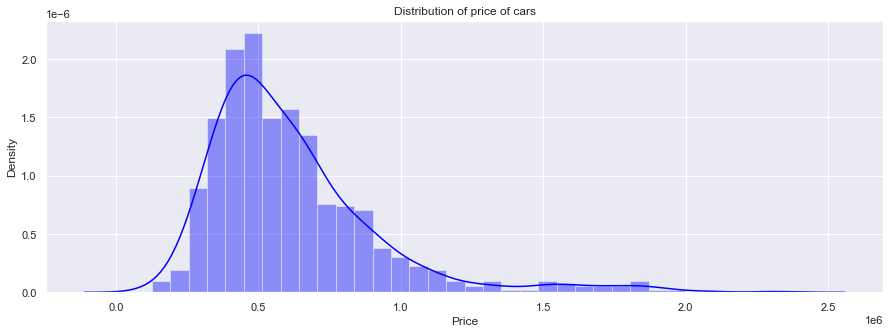

In [145]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Price'], color = 'blue')
plt.title('Distribution of price of cars')
plt.show()

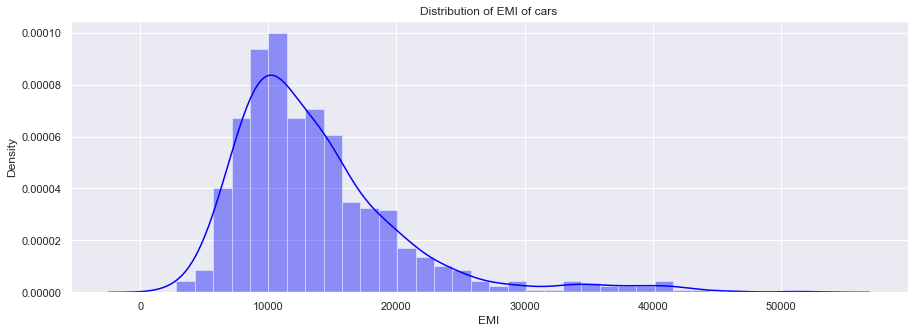

In [146]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['EMI'], color = 'blue')
plt.title('Distribution of EMI of cars')
plt.show()

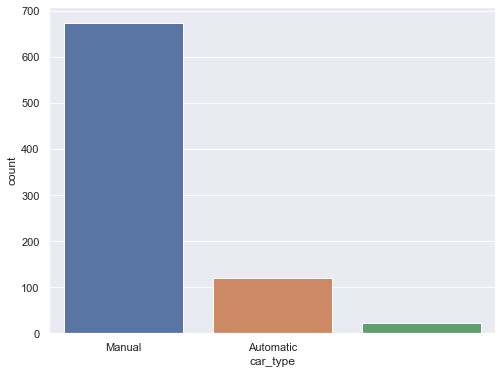

In [140]:
plt.figure(figsize=(8,6))
sns.countplot(df['car_type'])
plt.show()

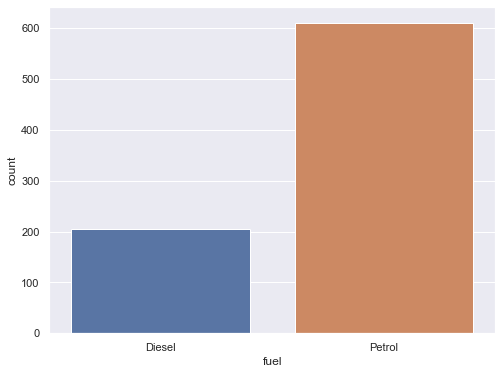

In [141]:
plt.figure(figsize=(8,6))
sns.countplot(df['fuel'])
plt.show()

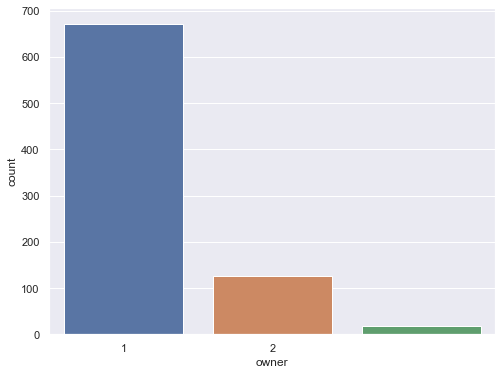

In [142]:
plt.figure(figsize=(8,6))
sns.countplot(df['owner'])
plt.show()

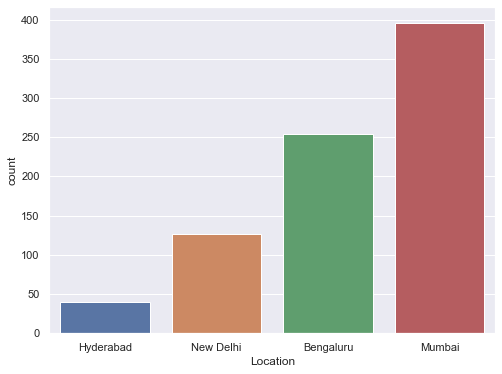

In [144]:
plt.figure(figsize=(8,6))
sns.countplot(df['Location'])
plt.show()

<AxesSubplot:xlabel='Year'>

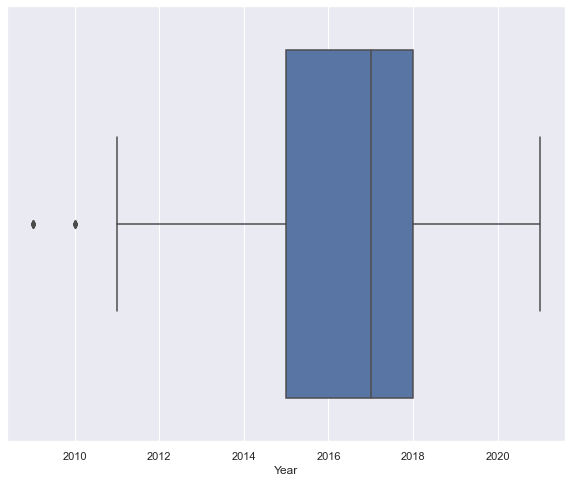

In [149]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Year'])

In [154]:
df[df['Year']<2010]

,Year,Brand,Model,Type,car_type,owner,fuel,km,Price,Discount,EMI,Location
113,2009,Maruti,Wagon R,LXI MINOR,Manual,1,Petrol,36035,148199,8000.0,3297,New Delhi
118,2009,Maruti,Alto,LXI,Manual,1,Petrol,119227,126399,5000.0,2812,New Delhi
343,2009,Hyundai,i20,MAGNA 1.2 VTVT,Manual,2,Petrol,42118,325399,23000.0,7238,Bengaluru
351,2009,Maruti,Alto,LXI,Manual,1,Petrol,26743,186499,10000.0,4149,Bengaluru
414,2009,Hyundai,i10,MAGNA 1.2 AT,Automatic,1,Petrol,27005,333399,22000.0,7416,Bengaluru
422,2009,Hyundai,i10,MAGNA 1.2 AT,Automatic,2,Petrol,58491,252399,6000.0,5614,Bengaluru


<AxesSubplot:xlabel='Price'>

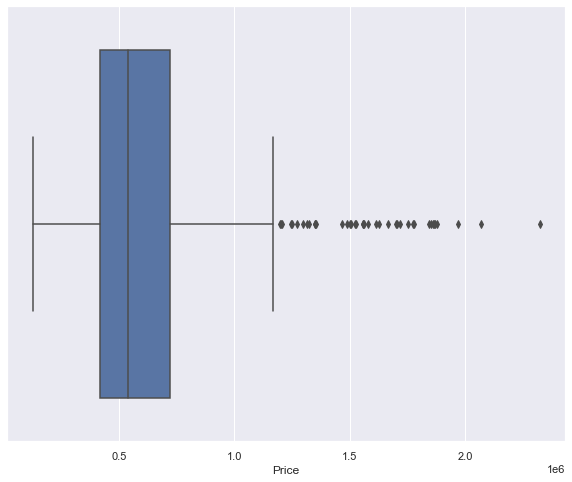

In [155]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Price'])

<AxesSubplot:xlabel='Discount'>

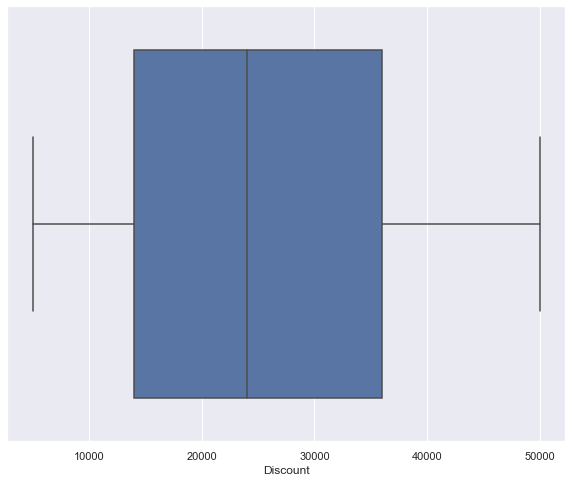

In [156]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Discount'])

<AxesSubplot:xlabel='EMI'>

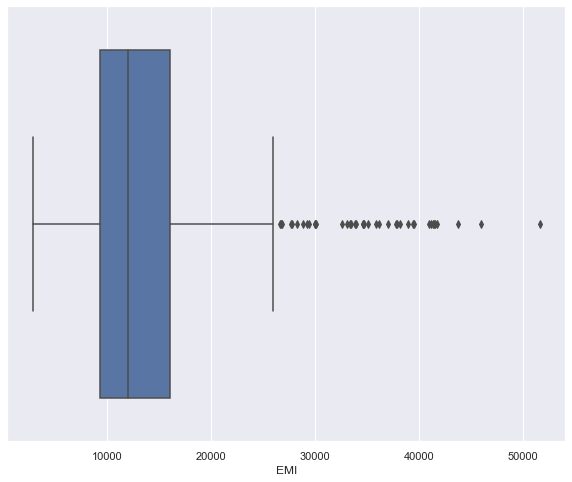

In [157]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['EMI'])

In [162]:
df[df['owner']==""]['Year'].mode()

0    2015
dtype: int32

In [164]:
df[df["Year"]==2015]['owner'].mode()

0    1
dtype: object

In [170]:
df[df['car_type']==""]

,Year,Brand,Model,Type,car_type,owner,fuel,km,Price,Discount,EMI,Location
17,2019,Hyundai,NEW SANTRO,1.1 SPORTS MT CNG,,1,Petrol,36126,476399,5000.0,10597,Hyderabad
76,2016,Hyundai,Elite i20,Sportz 1.2 VTVT MT,,1,Petrol,24365,620199,32000.0,13796,Hyderabad
78,2018,Hyundai,Elite i20,ASTA 1.2 AT,,1,Petrol,20001,752899,10000.0,16748,Hyderabad
140,2018,Datsun,Redi Go,1.0 S AT,,1,Petrol,21607,340399,29000.0,7572,New Delhi
154,2018,Hyundai,Creta,1.4 E PLUS CRDI,,1,Diesel,32387,895399,48000.0,19918,New Delhi
216,2016,Hyundai,Creta,1.6 SX CRDI,,1,Diesel,113574,884999,50000.0,19686,Bengaluru
259,2016,Renault,Kwid,RXT 1.0 EASY-R AT,,2,Petrol,35941,417599,5000.0,9289,Bengaluru
297,2019,Renault,Kwid,CLIMBER 1.0 AT,,1,Petrol,12449,436999,37000.0,9721,Bengaluru
374,2019,Maruti,New Wagon-R,VXI (O)1.OL AGS,,1,Petrol,19182,503499,30000.0,11200,Bengaluru
401,2018,Renault,Kwid,CLIMBER 1.0 AT,,2,Petrol,19422,404099,23000.0,8989,Bengaluru
